<a href="https://colab.research.google.com/github/wilferalexander/Fuga_Empleados/blob/main/Fuga_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuga Empleados**

#**Objetivos del proyecto**

Como te ha explicado el director de data science el gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa.

Para ello durante esta semana vas a trabajar en 3 grandes cosas:

1. Entender y cuantificar el problema desde el punto de vista de negocio
2. Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga
3. Comunicar los resultados de forma exitosa a la dirección

#Dia 1

**Tareas para hoy**

Hoy nos vamos a centrar solo en 2 tareas, pero de gran importancia.

1. Entender el tipo de solución de data science que vamos a construir
2. Configurar el entorno de trabajo en el que vamos a realizar el proyecto

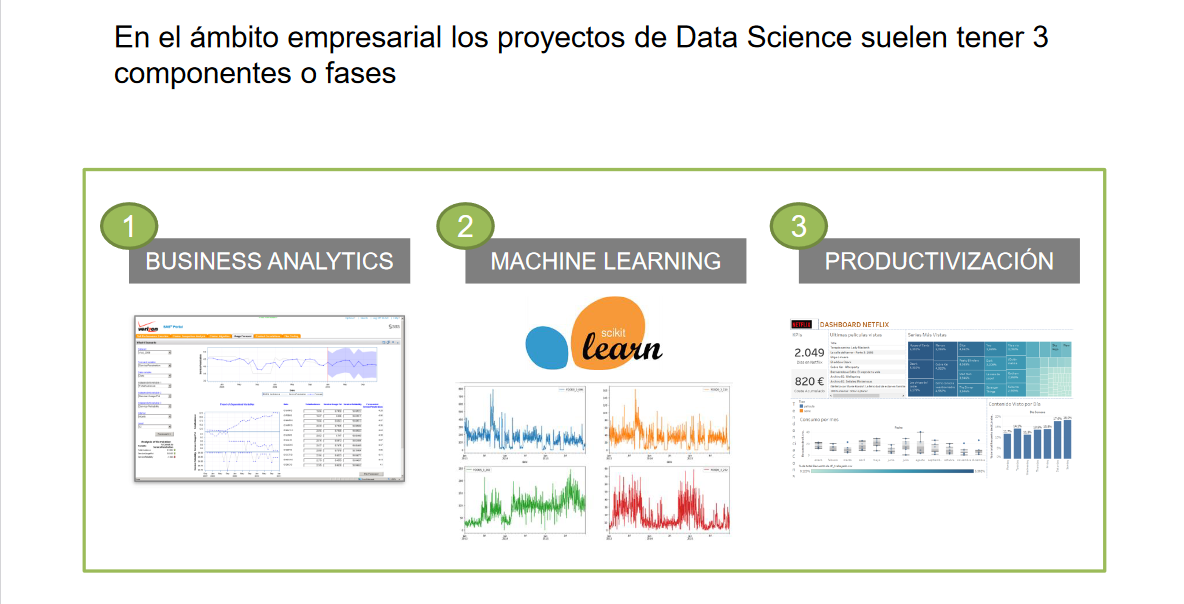

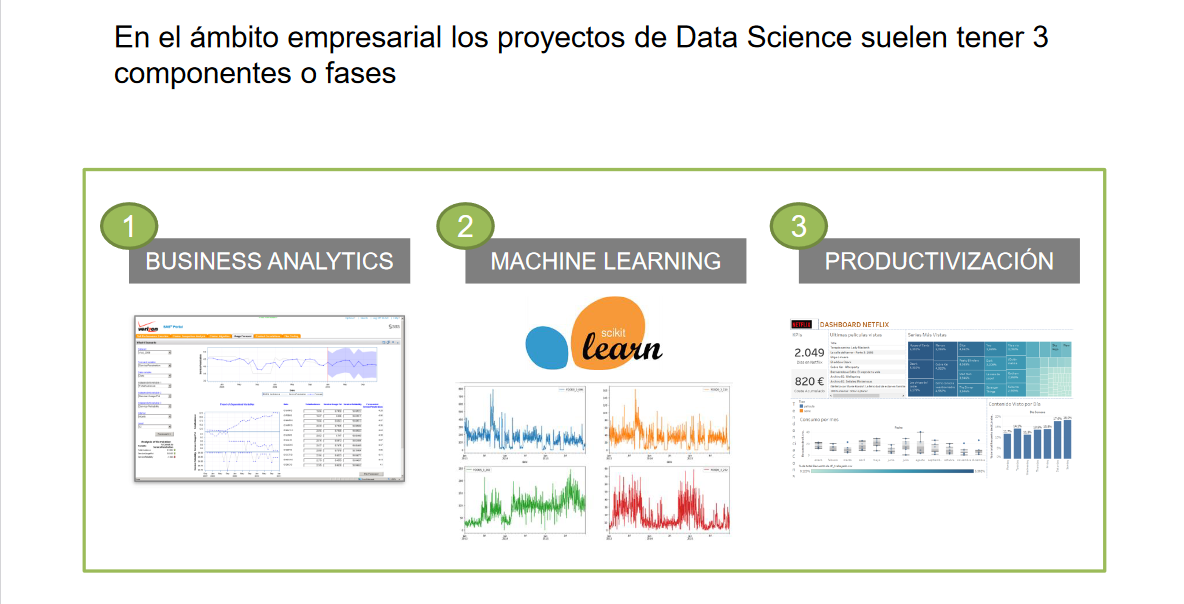


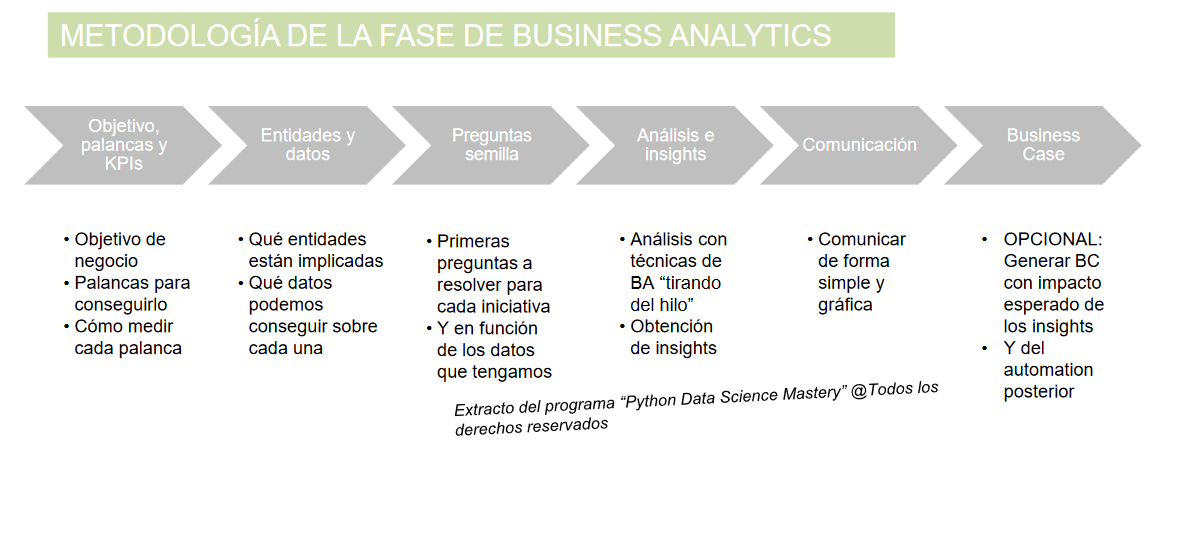

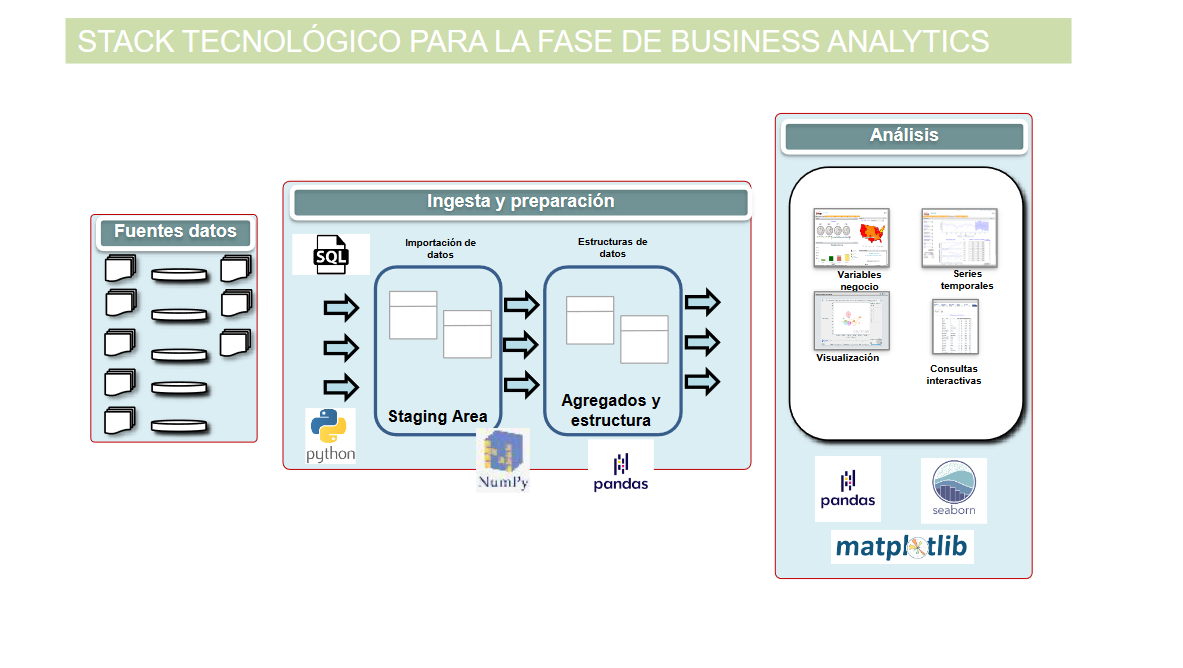

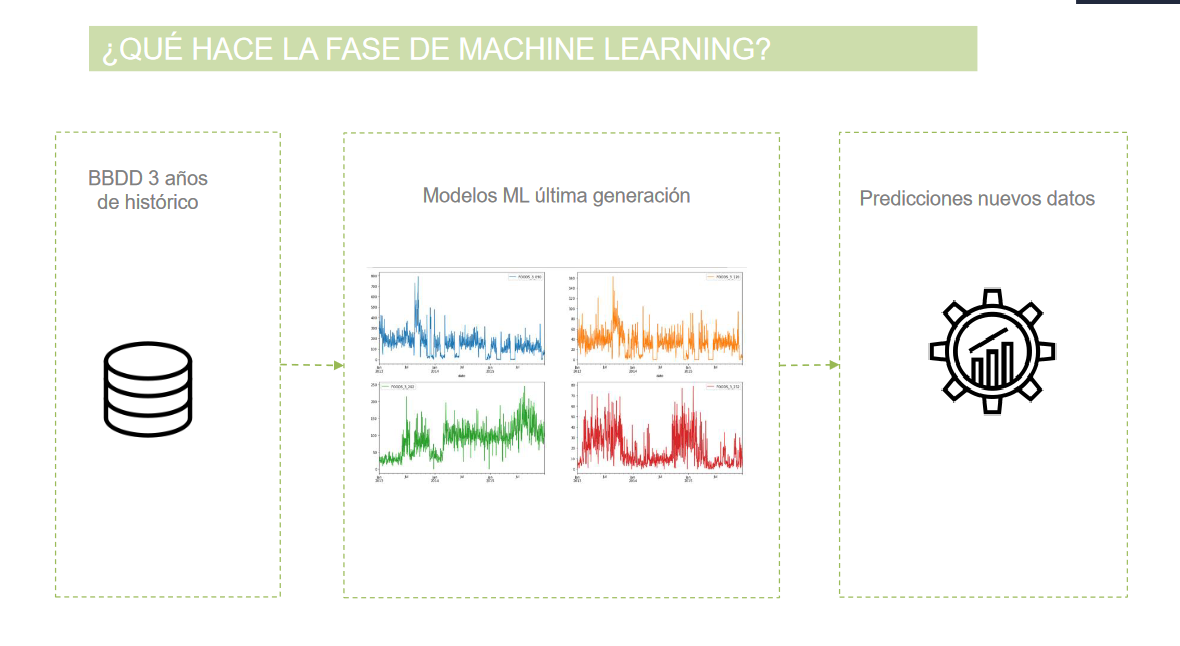

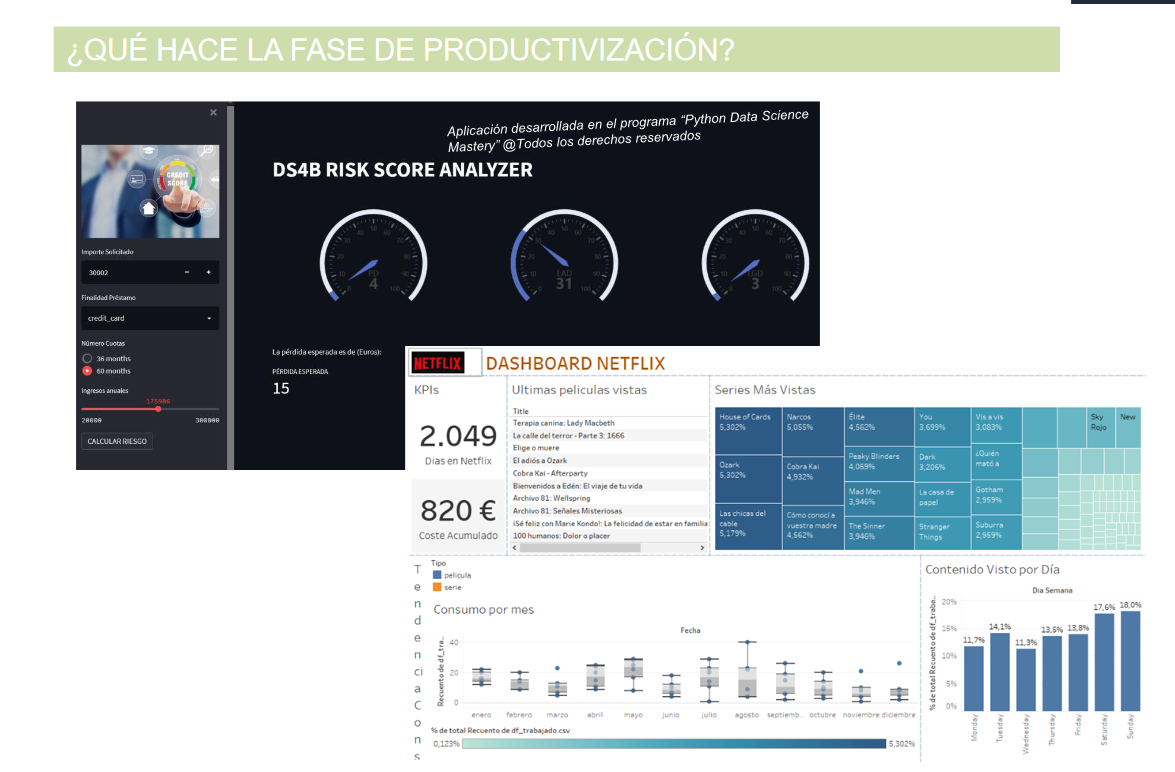

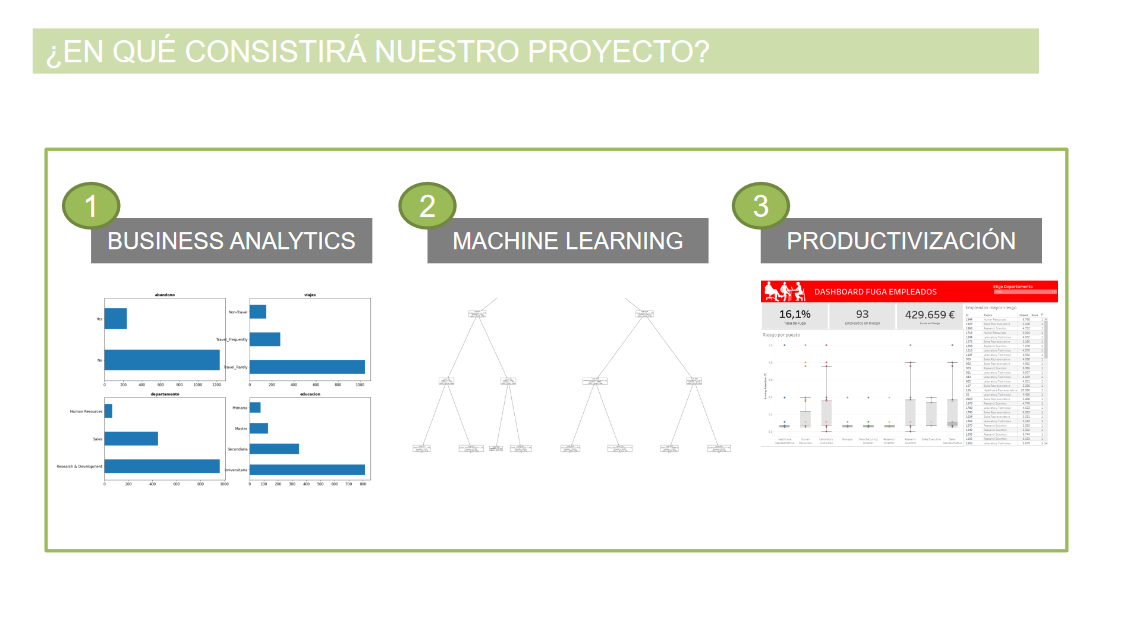


## DIA 1: CONFIGURACIÓN DEL ENTORNO

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

### CARGA DE LOS DATOS



Antes de continuar deberás:

  


1.   Haber descargado los datos de la plataforma
2.   Haberlos descomprimido en alguna carpeta de tu disco duro
3. Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)






  



In [16]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col='id', na_values=('#N/D'))

In [17]:
df.sample(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1269,19,No,Travel_Rarely,Research & Development,25,NaN,Life Sciences,1,Media,4.0,...,Muy_Alta,80,0,1,2,Muy_Alta,1,NaN,0,1
1171,42,No,Travel_Rarely,Sales,4,Universitaria,Marketing,1,Media,3.0,...,Muy_Alta,80,0,9,3,NaN,6,NaN,1,5
556,38,No,Travel_Frequently,Research & Development,2,NaN,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,1,1,3,NaN,1,NaN,0,0
13,36,No,Travel_Rarely,Research & Development,27,Universitaria,Medical,1,Alta,3.0,...,Media,80,2,17,3,Alta,7,NaN,7,7
377,28,No,Travel_Rarely,Research & Development,9,Universitaria,Medical,1,Muy_Alta,3.0,...,Muy_Alta,80,1,5,3,NaN,5,NaN,0,4


In [18]:
#Información de los datos del dataset
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])
print('Datos Duplicados: ', df.duplicated().sum())
print('Variables Categóricas:: ', df.select_dtypes(include='object').shape[1])
print('Variables Numéricas: ', df.select_dtypes(exclude='object').shape[1])

Número de filas:  1470
Número de columnas:  31
Datos Duplicados:  0
Variables Categóricas::  15
Variables Numéricas:  16


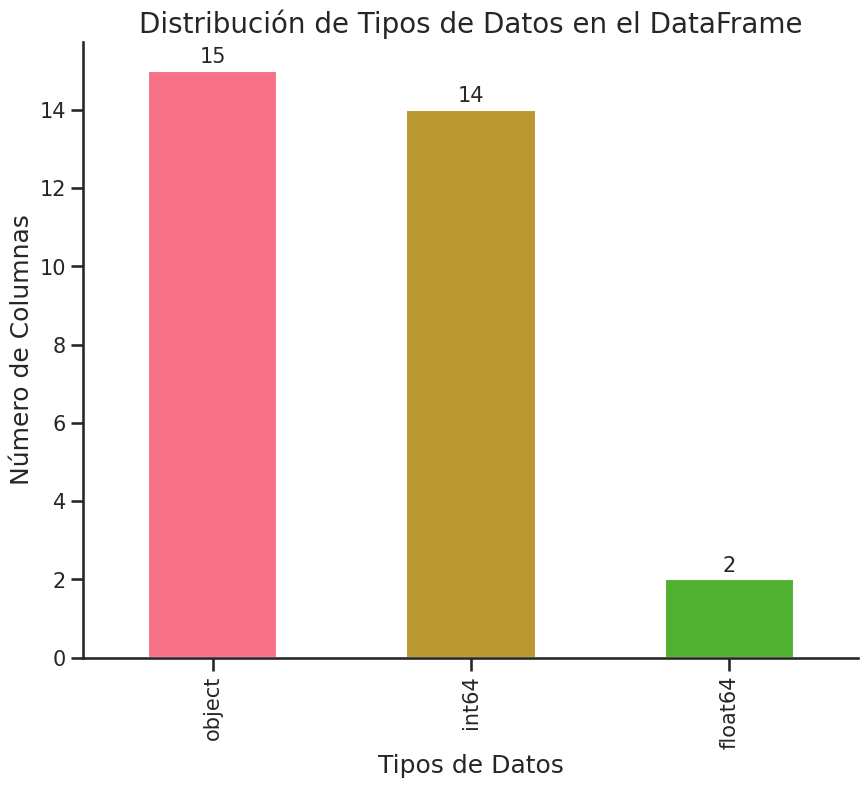

In [21]:
# Establecemos el estilo de Seaborn
sns.set(style ='ticks', context='talk', font_scale=1, palette='husl')

# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))

# contamos los tipos de datos y crea un gráfico de barras
ax = df.dtypes.value_counts().plot(kind='bar',color=sns.color_palette('husl'), grid=False, fontsize=15)

# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2.,height +0.2, height, ha = 'center', size= 15)

# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)

# Eliminamos los bordes desagradables
sns.despine()

# Mostramos el gráfico
plt.show()


In [22]:
#datos nulos
df.isnull().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [23]:
#estadistica descriptiva
df.describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,232.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.771552,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,0.705244,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,4.000000,15.000000,17.000000


In [24]:
df.nunique()

edad                          43
abandono                       2
viajes                         3
departamento                   3
distancia_casa                29
educacion                      4
carrera                        6
empleados                      1
satisfaccion_entorno           4
sexo                           4
implicacion                    4
nivel_laboral                  5
puesto                         9
satisfaccion_trabajo           4
estado_civil                   3
salario_mes                 1349
num_empresas_anteriores       10
mayor_edad                     1
horas_extra                    2
incremento_salario_porc       15
evaluacion                     2
satisfaccion_companeros        4
horas_quincena                 1
nivel_acciones                 4
anos_experiencia              40
num_formaciones_ult_ano        7
conciliacion                   4
anos_compania                 37
anos_en_puesto                 4
anos_desde_ult_promocion      16
anos_con_m

<ipython-input-25-377cbd285027>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.set_yticklabels(df.corr(), rotation = 0)
<ipython-input-25-377cbd285027>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax.set_xticklabels(df.corr())


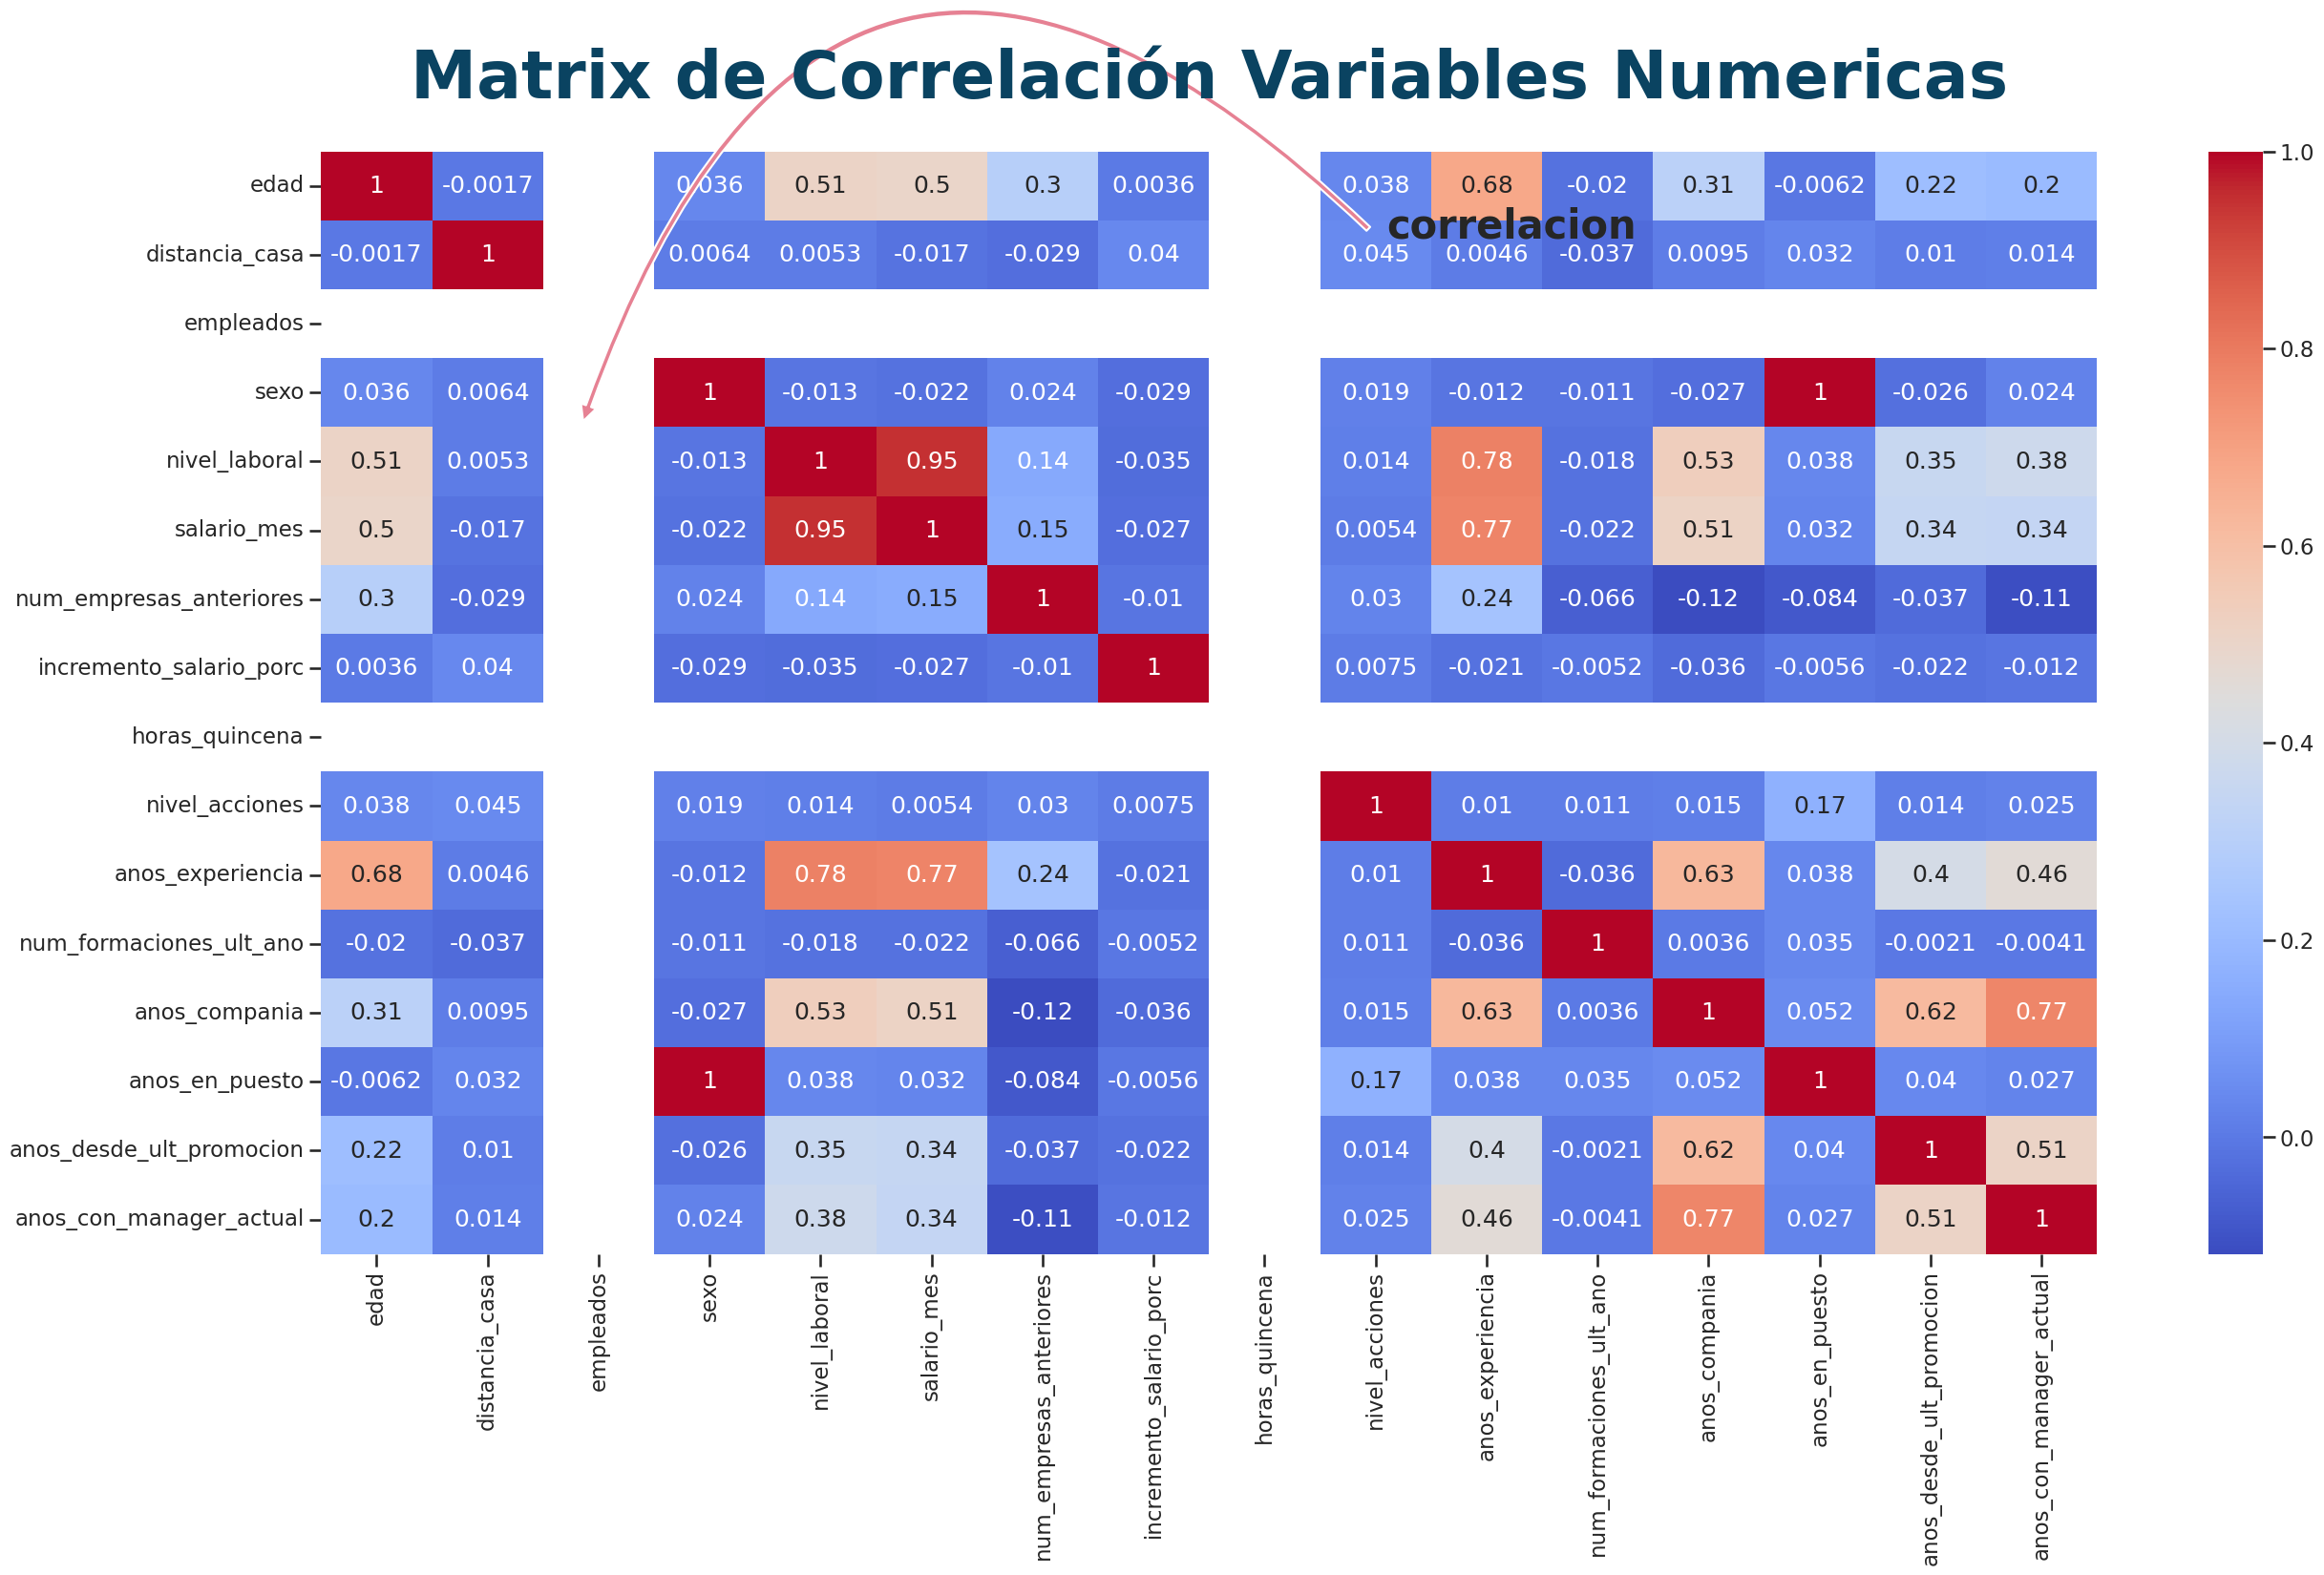

In [25]:
#Correlación Entre Variables Numéricas
corr=df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df.corr(), rotation = 0)
ax.set_xticklabels(df.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()
